# Exercícios - Data Viz II

### Questão 1

Utilizando o dataset `Tips`, vamos desenvolver as seguintes visualizações:

__A)__ Faça um histograma para a distribuição da coluna `total_bill`;

__B)__ Faça um gráfico de dispersão entre as colunas `total_bill` e `tip`;

__C)__ Como ficaria o histograma da coluna `total_bill` quando separamos os dados pelo coluna `time`, ou seja entre o Almoço e o jantar.

### Resolução:

__A)__ Faça um histograma para a distribuição da coluna `total_bill`;

Primeiramente, vamos fazer carregar as bibliotecas usuais quando trabalhamos com _datasets_:

In [1]:
# Import das libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Da biblioteca `seaborn`, utilizada para visualização de dados também, vamos utilizar da função `.load_dataset` para carregar o _dataset_ `'Tips'`:

In [2]:
# Carregando o dataset tips
tips = sns.load_dataset('tips')

In [3]:
# Print do Dataset
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


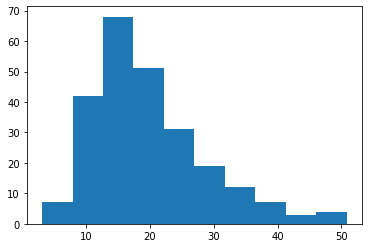

In [11]:
# Plot do histograma
plt.hist(tips['total_bill'], bins = 10)

# Cria um titulo
plt.title('Histograma - total_bill')

# Coloca nome no eixo X
plt.xlabel('tip')

# Coloca nome no eixo y
plt.ylabel('Frequência')

# Mostra o gráfico
plt.show()

Uma outra forma de criar o histograma é justamente utilizar do `seaborn`, como no exemplo a seguir:

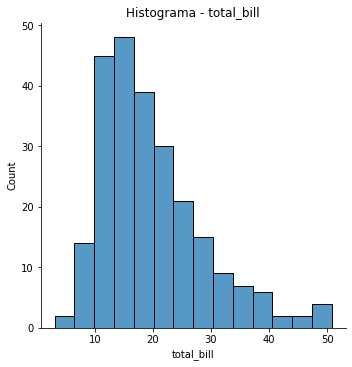

In [4]:
# Define o gráfico da distribuição
sns.displot(tips['total_bill'])

# Cria um titulo
plt.title('Histograma - total_bill')

# Mostra o gráfico
plt.show()

__B)__ Faça um gráfico de dispersão entre as colunas `total_bill` e `tip`;

A ideia do _Scatterplot_ é justamente entender a relação entre a variável `total_bill` (total consumido no restaurante) e o `tip` (gorjeta):

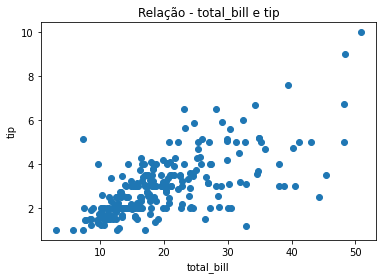

In [42]:
# Cria o gráfico
plt.scatter(tips['total_bill'], tips['tip'])

# Cria um titulo
plt.title('Relação - total_bill e tip')

# Coloca nome no eixo X
plt.xlabel('total_bill')

# Coloca nome no eixo y
plt.ylabel('tip')

# Mostra o gráfico
plt.show()

Novamente vamos fazer a mesma versão do gráfico com o `seaborn`:

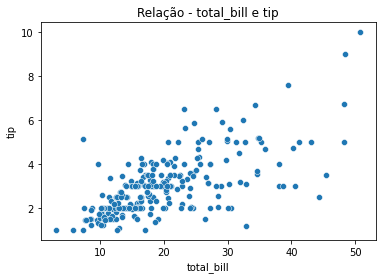

In [5]:
# Define o gráfico usando o seaborn
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')

# Cria um titulo
plt.title('Relação - total_bill e tip')

# Mostra o Gráfico
plt.show()

__C)__ Como ficaria o histograma da coluna `total_bill` quando separamos os dados pelo coluna `time`, ou seja entre o almoço e o jantar.

Nesse caso, vamos utilizar dos _subplots_ para poder criar os gráficos em conjunto:

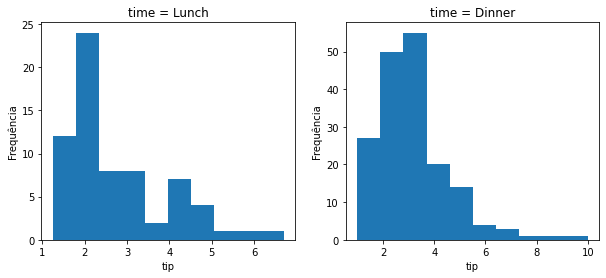

In [6]:
# ajusta o tamanho da figura total do gráfico
plt.figure(figsize=(10, 4))

# 1 linha, 2 colunas, estamos no gráfico 1
plt.subplot(121)
# Define o gráfico para o Lunch
plt.hist(tips[tips['time'] == 'Lunch']['tip'])
# Cria um titulo para o Gráfico 1
plt.title('time = Lunch')
# Coloca nome no eixo X
plt.xlabel('tip')
# Coloca nome no eixo y
plt.ylabel('Frequência')

# 1 linha, 2 colunas, estamos no gráfico 2
plt.subplot(122)
# Define o gráfico para o Dinner
plt.hist(tips[tips['time'] == 'Dinner']['tip'])
# Cria um titulo para o Gráfico 2
plt.title('time = Dinner')
# Coloca nome no eixo X
plt.xlabel('tip')
# Coloca nome no eixo y
plt.ylabel('Frequência')

# Print dos gráficos
plt.show()

No `seaborn`, podemos utilizar de uma função chamada `FacetGrid`, onde passamos a coluna que queremos a separação e o `seaborn` irá replicar o gráfico para todas as separações póssiveis:

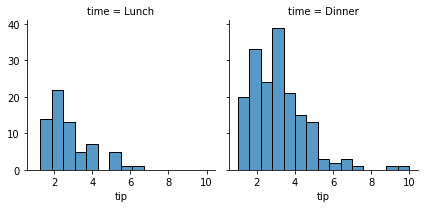

In [7]:
# Cria o FacetGrid
grid = sns.FacetGrid(tips, col="time")

# Cria o gráfico relacionado
grid.map(sns.histplot, "tip")

# Mostra o Gráfico
plt.show()

## 

### Questão 2

Utilizando o dataset `Iris.csv`, vamos levantar as seguintes visualizações dos dados:

__A)__ Faça um gráfico de barras para a frequência de cada uma das espécies (quantos dados temos para cada uma delas);

__B)__ Monte um gráfico de dispersão para a relação entre comprimento e largura da sépala;

__C)__ Monte um gráfico de dispersão para a relação entre comprimento e largura da pétala;

__D)__ Cria um _boxplot_ para a coluna `petal_length` para cada uma das espécies.

### Resolução:

__A)__ Faça um gráfico de barras para a frequência de cada uma das espécies (quantos dados temos para cada uma delas);


Primeiramente, carregamos as bibliotecas mais utilizadas para análise exploratória dos dados:

In [8]:
# Import das principais libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Carrega o csv
iris = pd.read_csv('iris.csv')

In [10]:
# Print das primeiras linhas do dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Esse item poderia ser feito de diversas maneiras, inclusive com `plt.bar`, mas uma forma mais prática de resolver é utilizar a função `countplot` do _seaborn_:

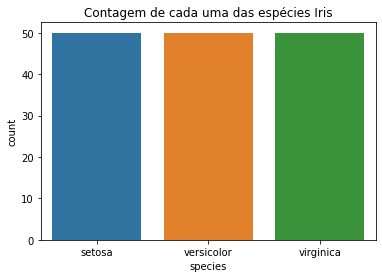

In [11]:
# Cria um gráfico de barras para as especies da Iris
sns.countplot(x="species", data=iris)

# Define um titulo
plt.title("Contagem de cada uma das espécies Iris")

# Mostra o gráfico
plt.show()

__B)__ Monte um gráfico de dispersão para a relação entre comprimento e largura da sépala;

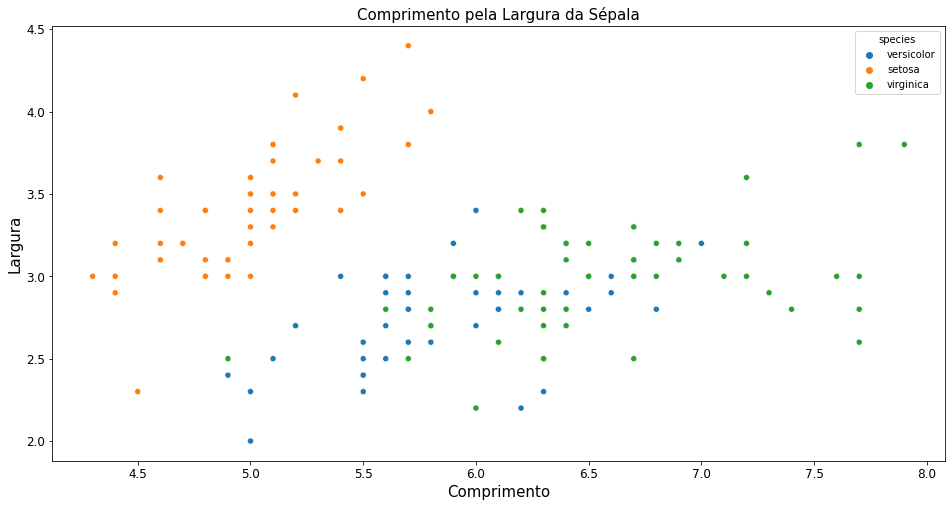

In [12]:
# Ajustando o tamanho da Figura
plt.figure(figsize = (16,8))

# Gráfico de dispersão
sns.scatterplot(data = iris, 
                x ='sepal_length',
                y= 'sepal_width',
                hue = 'species',
                hue_order = ['versicolor', 'setosa', 'virginica'])

# Coloca o titulo
plt.title('Comprimento pela Largura da Sépala', fontsize = 15)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize = 15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize = 15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Mostra o nosso Gráfico
plt.show()

__C)__ Monte um gráfico de dispersão para a relação entre comprimento e largura da pétala;

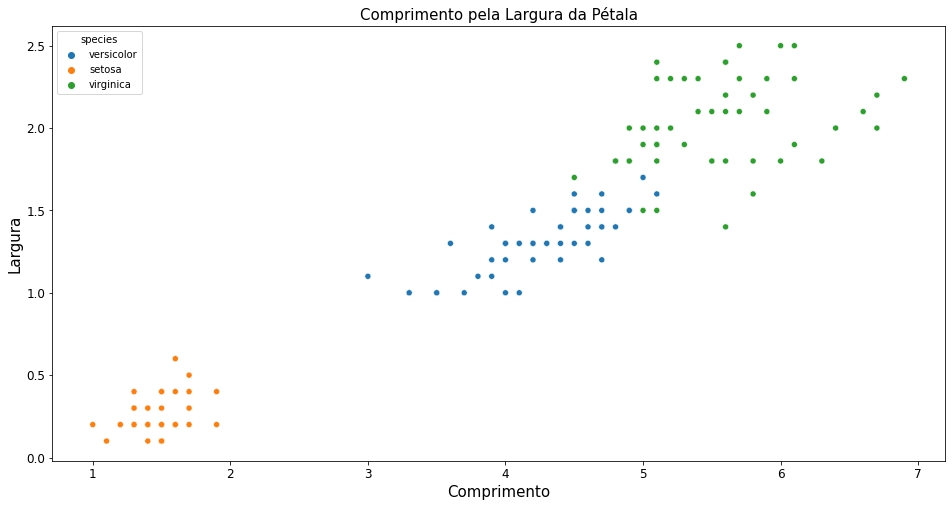

In [55]:
# Ajustando o tamanho da Figura
plt.figure(figsize = (16,8))

# Gráfico de dispersão
sns.scatterplot(data = iris, 
                x ='petal_length',
                y= 'petal_width',
                hue = 'species',
                hue_order = ['versicolor', 'setosa', 'virginica'])

# Coloca o titulo
plt.title('Comprimento pela Largura da Pétala', fontsize = 15)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize = 15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize = 15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Mostra o nosso Gráfico
plt.show()

__D)__ Cria um _boxplot_ para a coluna `petal_length` para cada uma das espécies.

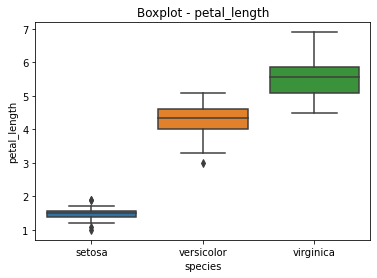

In [58]:
# Define o boxplot
sns.boxplot(x="species", y="petal_length", data=iris)

# Cria um titulo
plt.title('Boxplot - petal_length')

# Mostra o gráfico
plt.show()

## 

### Questão 3

Ainda utilizando o _dataset_ `iris.csv` e praticando mais funções do _seaborn_, vamos praticar outras novas visualizações:

__A)__ Crie um _HeatMap_ das correlações entre as variáveis do _dataset_;

__Dica.:__ Utilize as funções `pd.corr` e `sns.heatmap` 

__B)__ Crie um gráfico das correlações entre as variáveis utilizando a função `.pairplot()`;

__C)__ Crie um gráfico da dispersão entre as variáveis `sepal_length` e `sepal_width` mostrando a linha que represente o comportamento linear de cada uma das espécies.

__Dica.:__ Utilize a função `lmplot` do _seaborn_

### Resolução:

__A)__ Crie um _HeatMap_ das correlações entre as variáveis do _dataset_;

__Dica.:__ Utilize as funções `pd.corr` e `sns.heatmap` 


Primeiramente, carregamos as bibliotecas mais utilizadas para análise exploratória dos dados:

In [13]:
# Import das principais libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Carrega o csv
iris = pd.read_csv('iris.csv')

In [15]:
# Print das primeiras linhas do dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


O __HeatMap__ (Mapa de Calor) é um gráfico bem interessante quando queremos criar um _Grid_ de variações.<br><br>
Para usar o HeatMap, vamos definir primeiramente as correlações do DataFrame _Iris_:

In [16]:
corr = iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


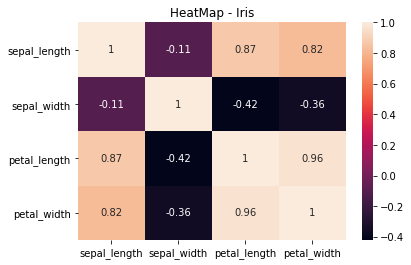

In [20]:
# Cria o HeatMap
sns.heatmap(corr, annot=True)

# Cria um titulo
plt.title("HeatMap - Iris")

# Mostra o Gráfico
plt.show()

__B)__ Crie um gráfico das correlações entre as variáveis utilizando a função `.pairplot()`;


O gráfico `PairPlot` é uma visualização bem interessante para entendermos as correlações das variáveis entre si, conforme na visualização abaixo para o `iris`:

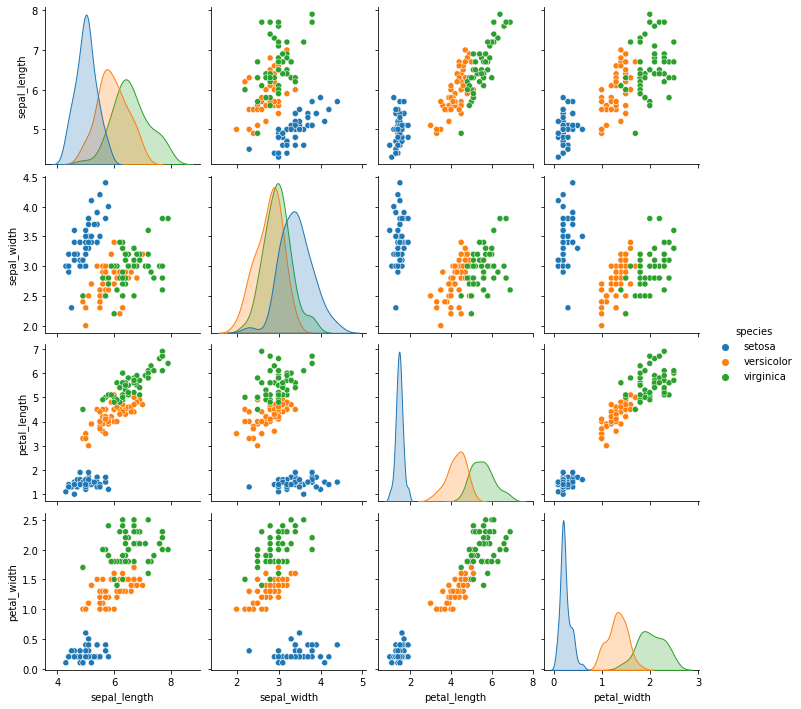

In [21]:
# Cria o pairplot
sns.pairplot(iris, hue='species')

# Mostra o gráfico
plt.show()

__C)__ Crie um gráfico da dispersão entre as variáveis `sepal_length` e `sepal_width` mostrando a linha que represente o comportamento linear de cada uma das espécies.

__Dica.:__ Utilize a função `lmplot` do _seaborn_

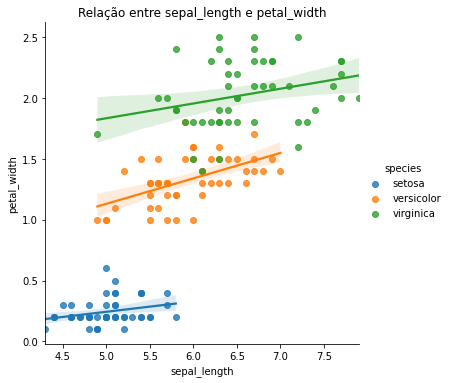

In [22]:
# Constroi o LMPlot
sns.lmplot(data = iris,
           x = 'sepal_length',
           y = 'petal_width',
           hue = 'species')

# Cria um titulo
plt.title('Relação entre sepal_length e petal_width')

# Mostra o Gráfico
plt.show()

## 